# Meeting Notes

## Showed Arjun Grouped Boxplots Comparing various kNN methods

In [5]:
from __future__ import division
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import time
import pandas as pd
from numpy import genfromtxt


['data', 'kval', 'method']


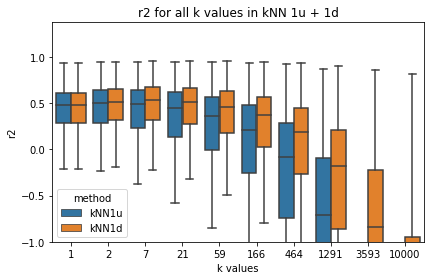

['data', 'kval', 'method']


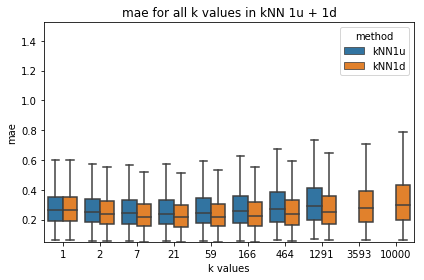

['data', 'kval', 'method']


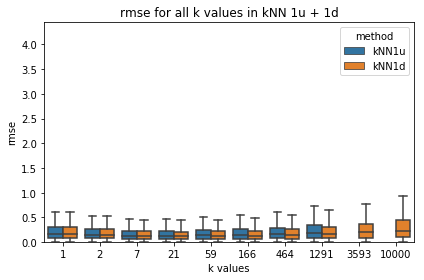

['data', 'kval', 'method']


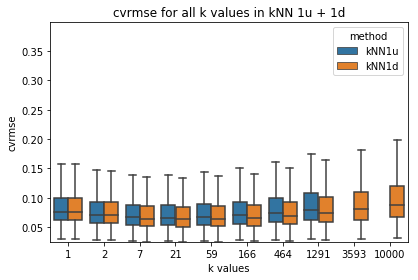

['data', 'kval', 'method']


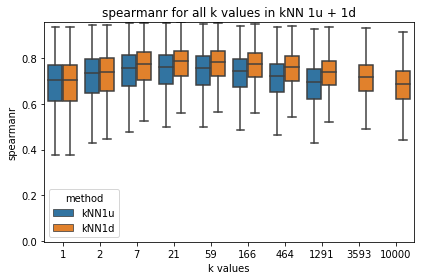

In [6]:
ks1 = np.logspace(0,4,10,endpoint=True)
ks12 = [1,2,7,21,59,166,464,1291]
ks2 = [10, 20, 50, 100, 250, 500, 1000, 2000, 5000]
metrics = ['r2','mae','rmse','cvrmse','spearmanr']
for metric in metrics:
    kNN1_data = np.empty((0,3))
    kNN2_data = np.empty((0,3))
    
    for k in ks12:
    
        array1 = np.load('/Users/JakeCanfield/Desktop/Krishnan Research Group/data/20180424/kNN1_uniform/%s_for_all_genes_k=%i.npy'%(metric,k))
        array1 = list(array1)
        kval = np.array(['%i'%k]*len(list(array1)))
        method = np.array(['kNN1u']*len(list(array1)))
        
        array2 = np.transpose(np.vstack((array1,kval,method)))
        kNN1_data = np.append(kNN1_data,array2,axis=0)
    
    for k in ks1.astype(int):

        array3 = np.load('/Users/JakeCanfield/Desktop/Krishnan Research Group/data/20180424/kNN1_distance/%s_for_all_genes_k=%i.npy'%(metric,k))
        kval = ['%i'%k]*len(list(array3))
        method = ['kNN1d']*len(list(array3))
        array4 = np.transpose(np.vstack((array3,kval,method)))
        kNN2_data = np.append(kNN2_data,array4,axis=0)
    labels_c = ['data','kval','method']
    print(labels_c)
    
    df = np.vstack((kNN1_data,kNN2_data))
    df = pd.DataFrame(df,columns=labels_c)
    df[['kval']] = df[['kval']].astype(int)
    df[['data']] = df[['data']].astype(float)
    sns.boxplot(data=df,x='kval',y='data',hue="method",showfliers=False)
    plt.xlabel('k values')
    plt.ylabel('%s'%metric)
    plt.title('%s for all k values in kNN 1u + 1d'%metric)
    plt.tight_layout()
    if df['data'].min() < -1:
        plt.ylim(ymin=-1)
    else:
        plt.ylim(ymin=df['data'].min(),ymax=df['data'].max())
        
    #plt.savefig('/Users/JakeCanfield/Desktop/Krishnan Research Group/data/20180424/%s_kNN1u+1d_boxplots'%metric)
    #plt.gcf().clear()
    #plt.close()
    plt.show()


## Discussed New Plots

###### Grouped Boxplots Escalating by Median

###### distance vs. uniform plot with reference line slope of 1

###### Boxplots for each method showing which k values work best for each gene



## New Methods & Next Steps

###### kNN2 distance

###### select best k for each gene and make these plots with this new method

